In [42]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',500)
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
output = pd.read_csv('5_factor_train_output.csv')
test = output
before = output

In [44]:
output.head()

,YearMonth,mkt_ret,SMB,HML,RMW,CMA,RF,PERMNO,ticker_ret,weight,ticker_excess_ret,residual,residual_sd,residual_mean,mkt_factor,SMB_factor,HML_factor,RMW_factor,CMA_factor,alpha,mkt_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,r_squared,t_alpha,t_mkt_beta,t_SMB_beta,t_HML_beta,t_RMW_beta,t_CMA_beta,port_mkt_beta,port_SMB_beta,port_HML_beta,port_RMW_beta,port_CMA_beta,residual_weight
0,196607,-0.0163,-0.005,0.0096,-0.0045,0.0177,0.0035,18980,-0.037109,-0.002255,-0.040609,0.009728,0.148051,1.233581e-17,-0.013076,-0.007089,-0.004334,-0.008672,-0.013397,-0.003769,0.802208,1.417739,-0.451467,1.927160,-0.756895,0.237294,0.778584,0.204331,0.028800,0.701054,0.205791,0.542405,-0.001809,-0.003196,0.001018,-0.004345,0.001707,-0.003467
1,196607,-0.0163,-0.005,0.0096,-0.0045,0.0177,0.0035,10233,-0.012346,0.003039,-0.015846,0.002008,0.025133,-2.235866e-17,-0.014804,-0.002619,0.014566,-0.001747,-0.029724,0.016473,0.908207,0.523761,1.517243,0.388161,-1.679317,0.081539,0.316029,0.236519,0.490773,0.292681,0.831851,0.269851,0.002760,0.001592,0.004610,0.001179,-0.005103,0.001527
2,196607,-0.0163,-0.005,0.0096,-0.0045,0.0177,0.0035,24715,-0.064846,-0.002527,-0.068346,-0.051933,-1.158477,-1.233581e-17,-0.027740,-0.003335,-0.001764,-0.001040,0.016862,0.000605,1.701857,0.667021,-0.183795,0.231172,0.952655,0.430509,0.947236,0.000347,0.123748,0.818671,0.821672,0.264632,-0.004301,-0.001686,0.000465,-0.000584,-0.002408,-0.003247
3,196607,-0.0163,-0.005,0.0096,-0.0045,0.0177,0.0035,28089,0.081522,-0.004142,0.078022,0.086465,1.484708,4.317534e-17,-0.008992,-0.007845,0.004546,-0.001266,0.010789,-0.005675,0.551683,1.568960,0.473589,0.281412,0.609545,0.257122,0.633314,0.322101,0.007500,0.649739,0.832718,0.579716,-0.002285,-0.006498,-0.001962,-0.001166,-0.002525,-0.007654
4,196607,-0.0163,-0.005,0.0096,-0.0045,0.0177,0.0035,32790,-0.038889,0.003104,-0.042389,-0.025153,-0.494623,-4.625929e-18,-0.014052,0.002212,0.001558,0.004413,-0.006599,-0.004767,0.862115,-0.442421,0.162329,-0.980565,-0.372846,-0.003939,0.646238,0.081650,0.361843,0.858313,0.401943,0.697686,0.002676,-0.001373,0.000504,-0.003044,-0.001157,0.005072


In [45]:
YearMonth = list(set(test['YearMonth'].values.tolist()))

# Conventional Return

'RMW','CMA'

In [46]:
'''
count_beta = individual stock beta / number of stocks per month
Author: Zhikang Wang / Robin Lam
'''
test = output
df_winner = pd.DataFrame()
df_loser = pd.DataFrame()

# YearMonth = YearMonth[]
for i in YearMonth:
#     print(i)
    temp = test[test['YearMonth'] == i]
    
    test_winner = temp[temp['weight'] > 0]
    test_loser = temp[temp['weight'] < 0]
    
    count_winner = len(set(test_winner['PERMNO'].values))
    count_loser = len(set(test_loser['PERMNO'].values))
    
#     temp['count'] = count
    test_winner['mkt_count_beta_winner'] = test_winner['mkt_beta']/count_winner
    test_winner['SMB_count_beta_winner'] = test_winner['SMB_beta']/count_winner
    test_winner['HML_count_beta_winner'] = test_winner['HML_beta']/count_winner
    test_winner['RMW_count_beta_winner'] = test_winner['RMW_beta']/count_winner
    test_winner['CMA_count_beta_winner'] = test_winner['CMA_beta']/count_winner
    
    test_loser['mkt_count_beta_loser'] = test_loser['mkt_beta']/count_loser
    test_loser['SMB_count_beta_loser'] = test_loser['SMB_beta']/count_loser
    test_loser['HML_count_beta_loser'] = test_loser['HML_beta']/count_loser
    test_loser['RMW_count_beta_loser'] = test_loser['RMW_beta']/count_loser
    test_loser['CMA_count_beta_loser'] = test_loser['CMA_beta']/count_loser    
    
    test_winner['e_weight_mkt_beta_winner'] = test_winner['mkt_count_beta_winner'].sum()
    test_loser['e_weight_mkt_beta_loser'] = test_loser['mkt_count_beta_loser'].sum()
    
    test_winner['e_weight_SMB_beta_winner'] = test_winner['SMB_count_beta_winner'].sum()
    test_loser['e_weight_SMB_beta_loser'] = test_loser['SMB_count_beta_loser'].sum()
    
    test_winner['e_weight_HML_beta_winner'] = test_winner['HML_count_beta_winner'].sum()
    test_loser['e_weight_HML_beta_loser'] = test_loser['HML_count_beta_loser'].sum()
    
    test_winner['e_weight_RMW_beta_winner'] = test_winner['RMW_count_beta_winner'].sum()
    test_loser['e_weight_RMW_beta_loser'] = test_loser['RMW_count_beta_loser'].sum()
    
    test_winner['e_weight_CMA_beta_winner'] = test_winner['CMA_count_beta_winner'].sum()
    test_loser['e_weight_CMA_beta_loser'] = test_loser['CMA_count_beta_loser'].sum()
    
    first_winner = test_winner.iloc[0]
    first_loser = test_loser.iloc[0]
    
    df_winner = df_winner.append(first_winner)
    df_loser = df_loser.append(first_loser)

/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

'RMW','CMA'

In [47]:
df_winner['Conventional Portfolio Type'] = 'Winner'
df_loser['Conventional Portfolio Type'] = 'Loser'
df_winner = df_winner.rename(columns = {'e_weight_mkt_beta_winner':'e_weight_mkt_beta','e_weight_SMB_beta_winner':
                                       'e_weight_SMB_beta','e_weight_HML_beta_winner':'e_weight_HML_beta',
                                       'e_weight_RMW_beta_winner': 'e_weight_RMW_beta',
                                       'e_weight_CMA_beta_winner':'e_weight_CMA_beta'})
df_loser = df_loser.rename(columns = {'e_weight_mkt_beta_loser':'e_weight_mkt_beta','e_weight_SMB_beta_loser':
                                       'e_weight_SMB_beta','e_weight_HML_beta_loser':'e_weight_HML_beta',
                                     'e_weight_RMW_beta_loser':'e_weight_RMW_beta',
                                       'e_weight_CMA_beta_loser':'e_weight_CMA_beta'})

train_port = pd.concat([df_winner, df_loser])
train_port['YearMonth'] = train_port['YearMonth'].astype(int)
train_port = train_port.sort_values(['YearMonth'])


/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [48]:
#train_port['Conventional Portfolio Type'] = train_port['weight'].apply(lambda x: 'Winner' if x<0 else 'Loser')
#train_port['Residual Portfolio Type'] = train_port['residual_weight'].apply(lambda x: 'Winner' if x<0 else 'Loser')
graph1 = train_port[['YearMonth','PERMNO','e_weight_mkt_beta','e_weight_SMB_beta','e_weight_HML_beta',
                     'e_weight_RMW_beta','e_weight_CMA_beta','Conventional Portfolio Type']]
graph2 = train_port[['YearMonth','mkt_ret','SMB','HML','RMW','CMA']]
graph2 = graph2.drop_duplicates() 
graph2['YearMonth'] = graph2['YearMonth'].shift(-1)
graph2 = graph2.dropna()
graph2['YearMonth'] = graph2['YearMonth'].astype(int)
graph1 = graph1[graph1['YearMonth'] != 193207]
graph = pd.merge(graph1,graph2, on = ['YearMonth'], how = 'left')
graph = graph.rename(columns = {"mkt_ret": "mkt_ret_t-1","SMB":"SMB_t-1","HML":"HML_t-1",
                               'RMW':'RMW_t-1','CMA':'CMA_t-1'})

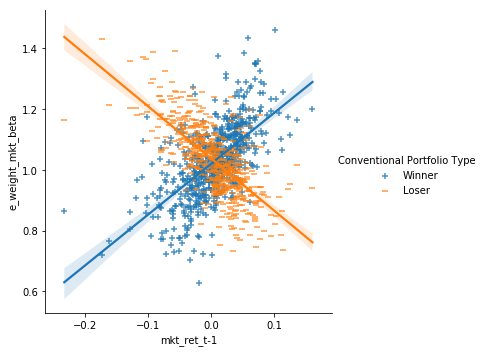

In [49]:
mkt_conventional = sns.lmplot(x="mkt_ret_t-1", y="e_weight_mkt_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_mkt_conventional.png')
# set(xlim=(-0.4,0.6),ylim=(0,2.5))

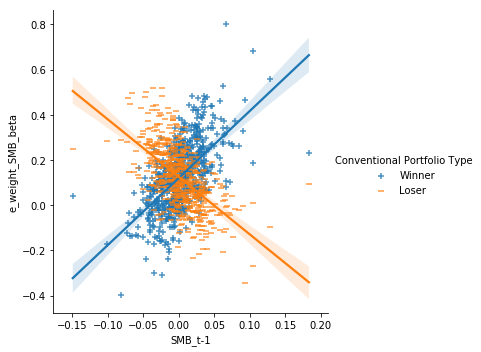

In [50]:
SMB_conventional = sns.lmplot(x="SMB_t-1", y="e_weight_SMB_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_SMB_conventional.png')

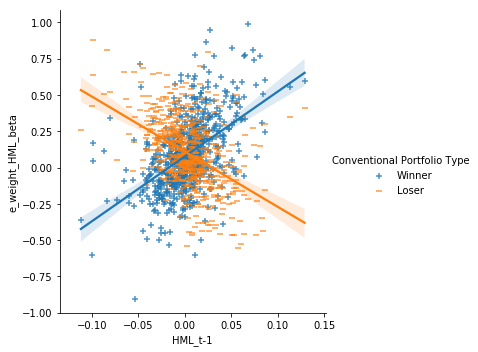

In [51]:
HML_conventional = sns.lmplot(x="HML_t-1", y="e_weight_HML_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_HML_conventional.png')

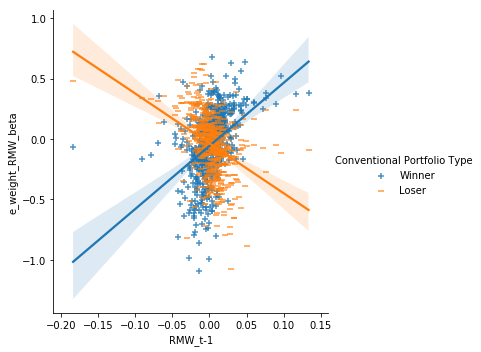

In [52]:
RMW_conventional = sns.lmplot(x="RMW_t-1", y="e_weight_RMW_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_RMW_conventional.png')

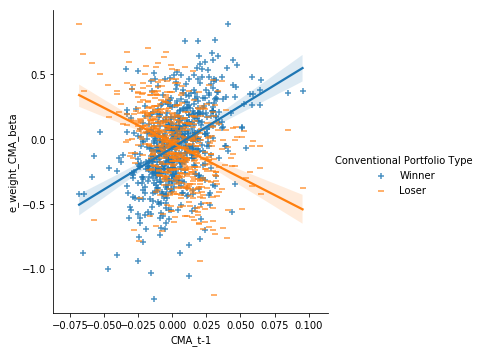

In [53]:
CMA_conventional = sns.lmplot(x="CMA_t-1", y="e_weight_CMA_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_CMA_conventional.png')

# Residual return

In [54]:
'''
count_beta = individual stock beta / number of stocks per month
Author: Zhikang Wang
'''
test = output
df_winner = pd.DataFrame()
df_loser = pd.DataFrame()

# YearMonth = YearMonth[]
for i in YearMonth:
    temp = test[test['YearMonth'] == i]
    
    test_winner = temp[temp['residual_weight'] > 0]
    test_loser = temp[temp['residual_weight'] < 0]
    
    count_winner = len(set(test_winner['PERMNO'].values))
    count_loser = len(set(test_loser['PERMNO'].values))
    
    test_winner['mkt_count_beta_winner'] = test_winner['mkt_beta']/count_winner
    test_winner['SMB_count_beta_winner'] = test_winner['SMB_beta']/count_winner
    test_winner['HML_count_beta_winner'] = test_winner['HML_beta']/count_winner
    test_winner['RMW_count_beta_winner'] = test_winner['RMW_beta']/count_winner
    test_winner['CMA_count_beta_winner'] = test_winner['CMA_beta']/count_winner
    
    test_loser['mkt_count_beta_loser'] = test_loser['mkt_beta']/count_loser
    test_loser['SMB_count_beta_loser'] = test_loser['SMB_beta']/count_loser
    test_loser['HML_count_beta_loser'] = test_loser['HML_beta']/count_loser
    test_loser['RMW_count_beta_loser'] = test_loser['RMW_beta']/count_loser
    test_loser['CMA_count_beta_loser'] = test_loser['CMA_beta']/count_loser    
    
    test_winner['e_weight_mkt_beta_winner'] = test_winner['mkt_count_beta_winner'].sum()
    test_loser['e_weight_mkt_beta_loser'] = test_loser['mkt_count_beta_loser'].sum()
    
    test_winner['e_weight_SMB_beta_winner'] = test_winner['SMB_count_beta_winner'].sum()
    test_loser['e_weight_SMB_beta_loser'] = test_loser['SMB_count_beta_loser'].sum()
    
    test_winner['e_weight_HML_beta_winner'] = test_winner['HML_count_beta_winner'].sum()
    test_loser['e_weight_HML_beta_loser'] = test_loser['HML_count_beta_loser'].sum()
    
    test_winner['e_weight_RMW_beta_winner'] = test_winner['RMW_count_beta_winner'].sum()
    test_loser['e_weight_RMW_beta_loser'] = test_loser['RMW_count_beta_loser'].sum()
    
    test_winner['e_weight_CMA_beta_winner'] = test_winner['CMA_count_beta_winner'].sum()
    test_loser['e_weight_CMA_beta_loser'] = test_loser['CMA_count_beta_loser'].sum()
    
    first_winner = test_winner.iloc[0]
    first_loser = test_loser.iloc[0]
    
    df_winner = df_winner.append(first_winner)
    df_loser = df_loser.append(first_loser)

/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [55]:
df_winner['Residual Portfolio Type'] = 'Winner'
df_loser['Residual Portfolio Type'] = 'Loser'
df_winner = df_winner.rename(columns = {'e_weight_mkt_beta_winner':'e_weight_mkt_beta','e_weight_SMB_beta_winner':
                                       'e_weight_SMB_beta','e_weight_HML_beta_winner':'e_weight_HML_beta',
                                       'e_weight_RMW_beta_winner': 'e_weight_RMW_beta',
                                       'e_weight_CMA_beta_winner':'e_weight_CMA_beta'})
df_loser = df_loser.rename(columns = {'e_weight_mkt_beta_loser':'e_weight_mkt_beta','e_weight_SMB_beta_loser':
                                       'e_weight_SMB_beta','e_weight_HML_beta_loser':'e_weight_HML_beta',
                                     'e_weight_RMW_beta_loser':'e_weight_RMW_beta',
                                       'e_weight_CMA_beta_loser':'e_weight_CMA_beta'})

train_port = pd.concat([df_winner, df_loser])
train_port['YearMonth'] = train_port['YearMonth'].astype(int)
train_port = train_port.sort_values(['YearMonth'])


/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [56]:
#train_port['Conventional Portfolio Type'] = train_port['weight'].apply(lambda x: 'Winner' if x<0 else 'Loser')
#train_port['Residual Portfolio Type'] = train_port['residual_weight'].apply(lambda x: 'Winner' if x<0 else 'Loser')
graph1 = train_port[['YearMonth','PERMNO','e_weight_mkt_beta','e_weight_SMB_beta','e_weight_HML_beta',
                     'e_weight_RMW_beta','e_weight_CMA_beta','Residual Portfolio Type']]
graph2 = train_port[['YearMonth','mkt_ret','SMB','HML','RMW','CMA']]
graph2 = graph2.drop_duplicates() 
graph2['YearMonth'] = graph2['YearMonth'].shift(-1)
graph2 = graph2.dropna()
graph2['YearMonth'] = graph2['YearMonth'].astype(int)
graph1 = graph1[graph1['YearMonth'] != 193207]
graph = pd.merge(graph1,graph2, on = ['YearMonth'], how = 'left')
graph = graph.rename(columns = {"mkt_ret": "mkt_ret_t-1","SMB":"SMB_t-1","HML":"HML_t-1",
                               'RMW':'RMW_t-1','CMA':'CMA_t-1'})

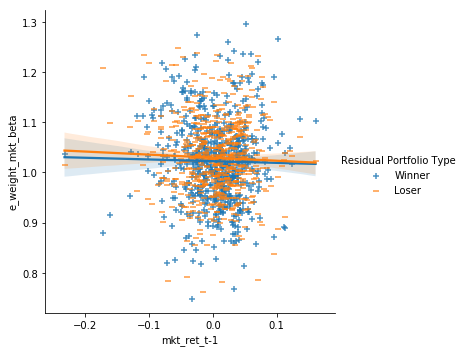

In [57]:
mkt_residual = sns.lmplot(x="mkt_ret_t-1", y="e_weight_mkt_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_mkt_residual.png')

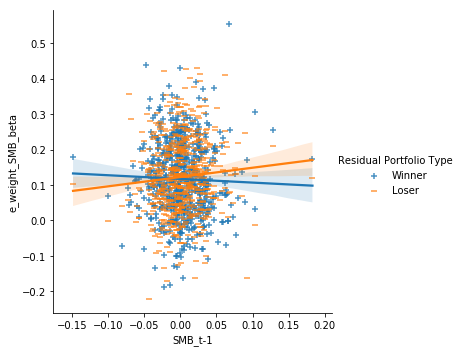

In [58]:
SMB_residual = sns.lmplot(x="SMB_t-1", y="e_weight_SMB_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_SMB_residual.png')

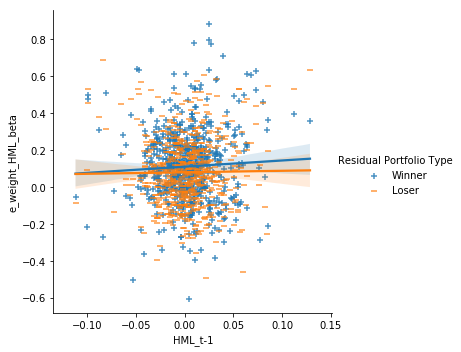

In [59]:
HML_residual = sns.lmplot(x="HML_t-1", y="e_weight_HML_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_HML_residual.png')

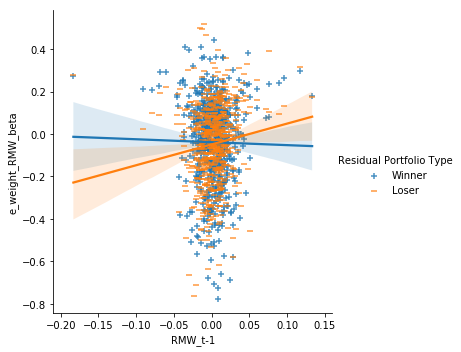

In [60]:
RMW_residual = sns.lmplot(x="RMW_t-1", y="e_weight_RMW_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_RMW_residual.png')

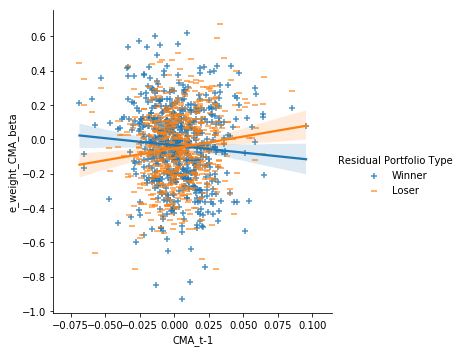

In [61]:
CMA_residual = sns.lmplot(x="CMA_t-1", y="e_weight_CMA_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('5_factor_CMA_residual.png')